In [1]:
import pandas as pd
import sklearn
import numpy as np
import csv
from csv import reader
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train_data3.csv")
df.head()

,paciente,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat20,feat21,feat22,feat23,feat24,feat25,feat26,UPDRS,Exame,Sick
0,40,471.0,0.000034,186.0,0.23,558.0,2793.0,0.26,1183.0,1.52,...,176,175,0.007179,0.000130,0.0,0,0.00,1,1,0
1,40,4319.0,0.000317,2774.0,1708.00,8322.0,13924.0,1195.00,8558.0,6036.00,...,258,256,0.007343,0.000312,2913.0,1,7038.00,1,2,0
2,40,1543.0,0.000103,1004.0,648.00,3012.0,17447.0,1694.00,11171.0,6851.00,...,426,425,0.006700,0.000108,351.0,0,0.00,1,3,0
3,40,2864.0,0.000212,1108.0,1147.00,3324.0,7692.0,1062.00,2555.0,4647.00,...,74,70,0.007405,0.000660,18056.0,2,6777.00,1,4,0
4,40,3878.0,0.000301,1795.0,1675.00,5386.0,11574.0,1212.00,3994.0,5.69,...,71,68,0.007766,0.001045,25333.0,2,11.75,1,5,0


In [3]:
df.shape

(1040, 30)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   paciente  1040 non-null   int64  
 1   feat1     1040 non-null   float64
 2   feat2     1040 non-null   float64
 3   feat3     1040 non-null   float64
 4   feat4     1040 non-null   float64
 5   feat5     1040 non-null   float64
 6   feat6     1040 non-null   float64
 7   feat7     1040 non-null   float64
 8   feat8     1040 non-null   float64
 9   feat9     1040 non-null   float64
 10  feat10    1040 non-null   float64
 11  feat11    1040 non-null   float64
 12  feat12    1040 non-null   float64
 13  feat13    1040 non-null   float64
 14  feat14    1040 non-null   float64
 15  feat15    1040 non-null   float64
 16  feat16    1040 non-null   float64
 17  feat17    1040 non-null   float64
 18  feat18    1040 non-null   float64
 19  feat19    1040 non-null   float64
 20  feat20    1040 non-null   int6

In [5]:
Sick = df.Sick
Sick

0       0
1       0
2       0
3       0
4       0
       ..
1035    1
1036    1
1037    1
1038    1
1039    1
Name: Sick, Length: 1040, dtype: int64

In [ ]:
#apaga as colunas menos relevantes pelo RFE

del df['feat7']
del df['feat9']
del df['feat10']
del df['feat11']
del df['feat12']
del df['feat13']
del df['feat14']
del df['feat19']
del df['feat20']
del df['feat21']
del df['feat23']



df.shape

In [6]:
#apaga a coluna de pacientes ID, exames e o Outcome
del df['paciente']
del df['Exame']
del df['Sick']
del df['UPDRS']

df.shape

(1040, 26)

In [7]:
#####################################################
#preparando os dados
#####################################################

In [8]:
from sklearn.model_selection import train_test_split

def embaralha(x,y):
    X_aux, X_emb, y_aux, y_emb = train_test_split(x, y, test_size=0.95 ,shuffle=True)
    r = (len(x)-len(x)*0.95)
    X_emb = X_emb.append(X_aux.iloc[0:int(r)])
    y_emb = y_emb.append(y_aux)
    return (X_emb, y_emb)

def cria(x,y):
    X_aux, X_emb, y_aux, y_emb = train_test_split(x, y, test_size=0.95 ,shuffle=False)
    r = (len(x)-len(x)*0.95)
    X_emb = X_emb.append(X_aux.iloc[0:int(r)])
    y_emb = y_emb.append(y_aux)
    return (X_emb, y_emb)


In [9]:
X_total, y_total = cria(df, Sick)

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_total_centered = X_total - X_total.mean(axis=0)

In [11]:
#Teste = grupo 1

In [12]:
X_test, X_train, y_test, y_train = train_test_split(df, Sick, test_size=0.75 ,shuffle=False)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(780, 26) (780,)
(260, 26) (260,)


In [ ]:
X_train_centered = X_train - X_train.mean(axis=0)
X_test_centered = X_test - X_train.mean(axis=0)

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_centered)

In [ ]:
PCA_train = pca.transform(X_train_centered)
PCA_test = pca.transform(X_test_centered)

In [ ]:
#-------------------------------------

In [ ]:
#Teste = grupo 2

In [13]:

X_test2, X_train2, y_test2, y_train2 = train_test_split(df, Sick, test_size=0.5 ,shuffle=False)

print(X_train2.shape, y_train2.shape)
print(X_test2.shape, y_test2.shape)

(520, 26) (520,)
(520, 26) (520,)


In [14]:
X_aux, X_test2, y_aux, y_test2 = train_test_split(X_test2, y_test2, test_size=0.5 ,shuffle=False)
print(X_test2.shape, y_test2.shape)

(260, 26) (260,)


In [15]:
X_train2 = X_aux.append(X_train2)
y_train2 = y_aux.append(y_train2)

In [ ]:
X_train2_centered = X_train2 - X_train2.mean(axis=0)
X_test2_centered = X_test2 - X_train2.mean(axis=0)

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train2_centered)

In [ ]:
PCA_train2 = pca.transform(X_train2_centered)
PCA_test2 = pca.transform(X_test2_centered)

In [ ]:
#-------------------------------------

In [16]:
#Teste = grupo 3

In [17]:

X_train3, X_test3, y_train3, y_test3 = train_test_split(df, Sick, test_size=0.5 ,shuffle=False)

print(X_train3.shape, y_train3.shape)
print(X_test3.shape, y_test3.shape)

(520, 26) (520,)
(520, 26) (520,)


In [18]:
X_test3, X_aux, y_test3, y_aux = train_test_split(X_test3, y_test3, test_size=0.5 ,shuffle=False)

print(X_test3.shape, y_test3.shape)
print(X_aux.shape, y_aux.shape)

(260, 26) (260,)
(260, 26) (260,)


In [19]:
X_train3 = X_train3.append(X_aux)
y_train3 = y_train3.append(y_aux)

In [ ]:
X_train3_centered = X_train3 - X_train3.mean(axis=0)
X_test3_centered = X_test3 - X_train3.mean(axis=0)

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train3_centered)

In [ ]:
PCA_train3 = pca.transform(X_train3_centered)
PCA_test3 = pca.transform(X_test3_centered)

In [ ]:
#-------------------------------------

In [20]:
#Teste = grupo 4

In [21]:

X_train4, X_test4, y_train4, y_test4 = train_test_split(df, Sick, test_size=0.25 ,shuffle=False)

print(X_train4.shape, y_train4.shape)
print(X_test4.shape, y_test4.shape)

(780, 26) (780,)
(260, 26) (260,)


In [ ]:
X_train4_centered = X_train4 - X_train4.mean(axis=0)
X_test4_centered = X_test4 - X_train4.mean(axis=0)

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train4_centered)

In [ ]:
PCA_train4 = pca.transform(X_train4_centered)
PCA_test4 = pca.transform(X_test4_centered)

In [ ]:
#-------------------------------------

In [22]:
#Checando feature importance


print(__doc__)
import matplotlib.pyplot as plt

Automatically created module for IPython interactive environment


In [23]:
X_train, X_test, y_train, y_test = train_test_split(df, Sick, stratify=Sick, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f'feature {i}' for i in range(df.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [27]:
import time

start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.013 seconds


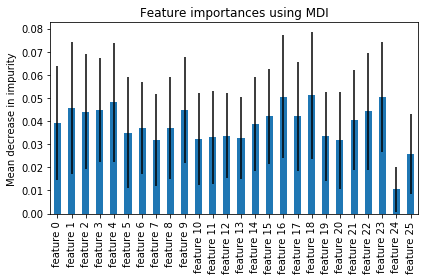

In [28]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [29]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 2.315 seconds


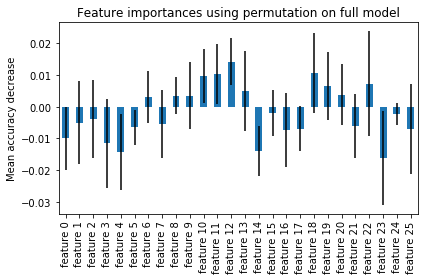

In [30]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
#------------------------------------

In [ ]:
#embaralhando (não embaralhar)
#X_train, y_train = embaralha(X_train, y_train)
#X_test, y_test = embaralha(X_test, y_test)

#X_train2, y_train2 = embaralha(X_train2, y_train2)
#X_test2, y_test2 = embaralha(X_test2, y_test2)

#X_train3, y_train3 = embaralha(X_train3, y_train3)
#X_test3, y_test3 = embaralha(X_test3, y_test3)

#X_train4, y_train4 = embaralha(X_train4, y_train4)
#X_test4, y_test4 = embaralha(X_test4, y_test4)


In [ ]:
#Normalizando os dados

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.fit_transform(X_test2)

X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.fit_transform(X_test3)

X_train4 = sc.fit_transform(X_train4)
X_test4 = sc.fit_transform(X_test4)


In [ ]:
PCA_train = sc.fit_transform(PCA_train)
PCA_train2 = sc.fit_transform(PCA_train2)
PCA_train3 = sc.fit_transform(PCA_train3)
PCA_train4 = sc.fit_transform(PCA_train4)

PCA_test = sc.fit_transform(PCA_test)
PCA_test2 = sc.fit_transform(PCA_test2)
PCA_test3 = sc.fit_transform(PCA_test3)
PCA_test4 = sc.fit_transform(PCA_test4)


In [ ]:
X_total = sc.fit_transform(X_total)

In [ ]:
#####################################################
#Aplicação SVM Linear
#####################################################

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 1
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmLin = GridSearchCV(Grid(kernel='linear'), param_grid, cv=5)
modelo_SvmLin.fit(X_train, y_train)

In [ ]:
modelo_SvmLin.best_estimator_

In [ ]:
#SVM Linear aplicado

modelo_SvmLin = svm.SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

modelo_SvmLin.fit(X_train, y_train)

In [ ]:
y_pred_modelLin = modelo_SvmLin.predict(X_test)
y_pred_modelLin

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 2
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmLin2 = GridSearchCV(Grid(kernel='linear'), param_grid, cv=5)
modelo_SvmLin2.fit(X_train2, y_train2)

In [ ]:
modelo_SvmLin2.best_estimator_

In [ ]:
#SVM Linear aplicado

modelo_SvmLin2 = svm.SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

modelo_SvmLin2.fit(X_train2, y_train2)

In [ ]:
y_pred_Lin2 = modelo_SvmLin2.predict(X_test2)

In [ ]:
y_pred_modelLin = np.append(y_pred_modelLin, y_pred_Lin2)
y_pred_modelLin

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 3
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmLin3 = GridSearchCV(Grid(kernel='linear'), param_grid, cv=5)
modelo_SvmLin3.fit(X_train3, y_train3)

In [ ]:
modelo_SvmLin3.best_estimator_

In [ ]:
#SVM Linear aplicado

modelo_SvmLin3 = svm.SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

modelo_SvmLin3.fit(X_train3, y_train3)

In [ ]:
y_pred_Lin3 = modelo_SvmLin3.predict(X_test3)

In [ ]:
y_pred_modelLin = np.append(y_pred_modelLin, y_pred_Lin3)
y_pred_modelLin

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 4
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmLin4 = GridSearchCV(Grid(kernel='linear'), param_grid, cv=5)
modelo_SvmLin4.fit(X_train4, y_train4)

In [ ]:
modelo_SvmLin4.best_estimator_

In [ ]:
#SVM Linear aplicado

modelo_SvmLin4 = svm.SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

modelo_SvmLin4.fit(X_train4, y_train4)

In [ ]:
y_pred_Lin4 = modelo_SvmLin4.predict(X_test4)

In [ ]:
y_pred_modelLin = np.append(y_pred_modelLin, y_pred_Lin4)
y_pred_modelLin

In [ ]:
###########
y_pred_modelLin.shape

In [ ]:
# Acurácia
print("Acurácia com K-fold SVM Linear:", accuracy_score(y_total, y_pred_modelLin))

In [ ]:
print(confusion_matrix(y_total, y_pred_modelLin))
print(classification_report(y_total, y_pred_modelLin))
print("Acurácia Polinomial:", accuracy_score(y_total, y_pred_modelLin))

In [ ]:
#####################################################
#Aplicação SVM Polinomial
#####################################################

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 1
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmPoly = GridSearchCV(Grid(kernel='poly'), param_grid, cv=5)
modelo_SvmPoly.fit(X_train, y_train)

In [ ]:
modelo_SvmPoly.best_estimator_

In [ ]:
#SVM polinomial aplicado

modelo_SvmPoly = svm.SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

modelo_SvmPoly.fit(X_train, y_train)

In [ ]:
y_pred_modelPoly= modelo_SvmPoly.predict(X_test)
y_pred_modelPoly

In [ ]:
#----------------------------------------

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 2
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmPoly2 = GridSearchCV(Grid(kernel='poly'), param_grid, cv=5)
modelo_SvmPoly2.fit(X_train2, y_train2)

In [ ]:
modelo_SvmPoly2.best_estimator_

In [ ]:
#SVM polinomial aplicado

modelo_SvmPoly2 = svm.SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

modelo_SvmPoly2.fit(X_train2, y_train2)

In [ ]:
y_pred2 = modelo_SvmPoly2.predict(X_test2)

In [ ]:
y_pred_modelPoly = np.append(y_pred_modelPoly, y_pred2)
y_pred_modelPoly

In [ ]:
#---------------------------------------------

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 3
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmPoly3 = GridSearchCV(Grid(kernel='poly'), param_grid, cv=5)
modelo_SvmPoly3.fit(X_train3, y_train3)

In [ ]:
modelo_SvmPoly3.best_estimator_

In [ ]:
#SVM polinomial aplicado

modelo_SvmPoly3 = svm.SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

modelo_SvmPoly3.fit(X_train3, y_train3)

In [ ]:
y_pred3 = modelo_SvmPoly3.predict(X_test3)

In [ ]:
y_pred_modelPoly = np.append(y_pred_modelPoly, y_pred3)
y_pred_modelPoly

In [ ]:
#---------------------------------------------

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 4
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmPoly4 = GridSearchCV(Grid(kernel='poly'), param_grid, cv=5)
modelo_SvmPoly4.fit(X_train4, y_train4)

In [ ]:
modelo_SvmPoly4.best_estimator_

In [ ]:
#SVM polinomial aplicado

modelo_SvmPoly4 = svm.SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

modelo_SvmPoly4.fit(X_train4, y_train4)

In [ ]:
y_pred4 = modelo_SvmPoly4.predict(X_test4)

In [ ]:
y_pred_modelPoly = np.append(y_pred_modelPoly, y_pred4)
print(len(y_pred_modelPoly))

In [ ]:
#------------------------------------------

In [ ]:
y_pred_modelPoly.shape

In [ ]:
# Acurácia
print("Acurácia com K-fold SVM POlinomial:", accuracy_score(y_total, y_pred_modelPoly))

In [ ]:
print(confusion_matrix(y_total, y_pred_modelPoly))
print(classification_report(y_total, y_pred_modelPoly))
print("Acurácia Polinomial:", accuracy_score(y_total, y_pred_modelPoly))

In [ ]:
#############################################

In [ ]:
## MODELO SVM com Kernel RBF

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 1
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmRBF = GridSearchCV(Grid(kernel='rbf'), param_grid, cv=5)
modelo_SvmRBF.fit(X_train, y_train)

In [ ]:
modelo_SvmRBF.best_estimator_

In [ ]:
#Gerando o modelo com kernel RBF

modelo_SvmRBF = svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

modelo_SvmRBF.fit(X_train, y_train)

In [ ]:
y_pred_rbf = modelo_SvmRBF.predict(X_test)

In [ ]:
#-----------------------------------------

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 2
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmRBF2 = GridSearchCV(Grid(kernel='rbf'), param_grid, cv=5)
modelo_SvmRBF2.fit(X_train2, y_train2)

In [ ]:
modelo_SvmRBF2.best_estimator_

In [ ]:
#Gerando o modelo com kernel RBF

modelo_SvmRBF2 = svm.SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

modelo_SvmRBF2.fit(X_train2, y_train2)

In [ ]:
y_pred_rbf2 = modelo_SvmRBF2.predict(X_test2)

In [ ]:
y_pred_rbf = np.append(y_pred_rbf, y_pred_rbf2)
y_pred_rbf

In [ ]:
#----------------------------------------------------------

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 3
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmRBF3 = GridSearchCV(Grid(kernel='rbf'), param_grid, cv=5)
modelo_SvmRBF3.fit(X_train3, y_train3)

In [ ]:
modelo_SvmRBF3.best_estimator_

In [ ]:
#Gerando o modelo com kernel RBF

modelo_SvmRBF3 = svm.SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

modelo_SvmRBF3.fit(X_train3, y_train3)

In [ ]:
y_pred_rbf3 = modelo_SvmRBF3.predict(X_test3)

In [ ]:
y_pred_rbf = np.append(y_pred_rbf, y_pred_rbf3)
y_pred_rbf

In [ ]:
#--------------------------------------------

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 4
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmRBF4 = GridSearchCV(Grid(kernel='rbf'), param_grid, cv=5)
modelo_SvmRBF4.fit(X_train4, y_train4)

In [ ]:
modelo_SvmRBF4.best_estimator_

In [ ]:
#Gerando o modelo com kernel RBF

modelo_SvmRBF4 = svm.SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

modelo_SvmRBF4.fit(X_train4, y_train4)

In [ ]:
y_pred_rbf4 = modelo_SvmRBF4.predict(X_test4)

In [ ]:
y_pred_rbf = np.append(y_pred_rbf, y_pred_rbf4)
y_pred_rbf

In [ ]:
#------------------------------------------------

In [ ]:
y_pred_rbf.shape

In [ ]:
# Acurácia SVM RBF
print("Acurácia K-fold SVM RBF", accuracy_score(y_total, y_pred_rbf))

In [ ]:
# Avaliação do modelo

print(confusion_matrix(y_total,y_pred_rbf))
print(classification_report(y_total,y_pred_rbf))  
print("Acurácia RBF:", accuracy_score(y_total, y_pred_rbf))

In [ ]:
#############################################
#Aplicação do KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 1
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

k_range = list(range(1, 31))

param_grid = dict(n_neighbors=k_range)

model_KNN = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
model_KNN.fit(X_train, y_train)

In [ ]:
model_KNN.best_estimator_

In [ ]:
model_KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')
model_KNN.fit(X_train, y_train)

In [ ]:
y_pred_knn = model_KNN.predict(X_test)

In [ ]:
#------------------------------------------

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 2
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 31))

param_grid = dict(n_neighbors=k_range)

model_KNN2 = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
model_KNN2.fit(X_train2, y_train2)

In [ ]:
model_KNN2.best_estimator_

In [ ]:
model_KNN2 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')
model_KNN2.fit(X_train2, y_train2)

In [ ]:
y_pred_knn2 = model_KNN2.predict(X_test2)

In [ ]:
y_pred_knn = np.append(y_pred_knn, y_pred_knn2)
y_pred_knn

In [ ]:
#--------------------------------------------

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 3
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 31))

param_grid = dict(n_neighbors=k_range)

model_KNN3 = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
model_KNN3.fit(X_train3, y_train3)

In [ ]:
model_KNN3.best_estimator_

In [ ]:
model_KNN3 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')
model_KNN3.fit(X_train3, y_train3)

In [ ]:
y_pred_knn3 = model_KNN3.predict(X_test3)

In [ ]:
y_pred_knn = np.append(y_pred_knn, y_pred_knn3)
y_pred_knn

In [ ]:
#-------------------------------------------

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 4
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 31))

param_grid = dict(n_neighbors=k_range)

model_KNN4 = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
model_KNN4.fit(X_train4, y_train4)

In [ ]:
model_KNN4.best_estimator_

In [ ]:
model_KNN4 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')
model_KNN4.fit(X_train4, y_train4)

In [ ]:
y_pred_knn4 = model_KNN4.predict(X_test4)

In [ ]:
y_pred_knn = np.append(y_pred_knn, y_pred_knn4)
y_pred_knn

In [ ]:
#--------------------------------------------------

In [ ]:
y_pred_knn.shape

In [ ]:
# Acurácia SVM RBF
print("Acurácia K-fold KNN", accuracy_score(y_total, y_pred_knn))

In [ ]:
print(confusion_matrix(y_total,y_pred_knn))
print(classification_report(y_total,y_pred_knn))  
print("Acurácia RBF:", accuracy_score(y_total, y_pred_knn))

In [ ]:
###################################################

In [ ]:
#REDE NEURAL  8-8

In [ ]:
#pip install tensorflow

In [ ]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [ ]:
##GRUPO 1

In [ ]:
classifier = Sequential()
classifier.add(Dense(8, input_shape=(15,), activation="relu"))
classifier.add(Dense(8, activation="relu"))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
H = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, validation_data = (X_test, y_test))

In [ ]:
y_pred_rn = classifier.predict(X_test)
y_pred_rn = np.round(abs(y_pred_rn))
y_pred_rn = y_pred_rn.astype('int64')

In [ ]:
y_pred_total = y_pred_rn

In [ ]:
plt.figure()
plt.plot(H.history["accuracy"], c='r')
plt.plot(H.history["val_accuracy"], c='y')
plt.show()

In [ ]:
plt.figure()
plt.plot(H.history["loss"])
plt.plot(H.history["val_loss"], c='g')
plt.show()

In [ ]:
##GRUPO 2

In [ ]:
classifier2 = Sequential()
classifier2.add(Dense(8, input_shape=(15,), activation="relu"))
classifier2.add(Dense(8, activation="relu"))
classifier2.add(Dense(units = 1, activation = 'sigmoid'))
classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
H2 = classifier2.fit(X_train2, y_train2, batch_size = 10, epochs = 100, validation_data = (X_test2, y_test2))

In [ ]:
y_pred_rn2 = classifier2.predict(X_test2)
y_pred_rn2 = np.round(abs(y_pred_rn2))
y_pred_rn2 = y_pred_rn2.astype('int64')

In [ ]:
y_pred_total = np.append(y_pred_total, y_pred_rn2)

In [ ]:
plt.figure()
plt.plot(H2.history["accuracy"], c='r')
plt.plot(H2.history["val_accuracy"], c='y')
plt.show()

In [ ]:
plt.figure()
plt.plot(H2.history["loss"])
plt.plot(H2.history["val_loss"], c='g')
plt.show()

In [ ]:
##GRUPO 3

In [ ]:
classifier3 = Sequential()
classifier3.add(Dense(8, input_shape=(15,), activation="relu"))
classifier3.add(Dense(8, activation="relu"))
classifier3.add(Dense(units = 1, activation = 'sigmoid'))
classifier3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
H3 = classifier3.fit(X_train3, y_train3, batch_size = 10, epochs = 100, validation_data = (X_test3, y_test3))

In [ ]:
y_pred_rn3 = classifier3.predict(X_test3)
y_pred_rn3 = np.round(abs(y_pred_rn3))
y_pred_rn3 = y_pred_rn3.astype('int64')

In [ ]:
y_pred_total = np.append(y_pred_total, y_pred_rn3)

In [ ]:
plt.figure()
plt.plot(H3.history["accuracy"], c='r')
plt.plot(H3.history["val_accuracy"], c='y')
plt.show()

In [ ]:
plt.figure()
plt.plot(H3.history["loss"])
plt.plot(H3.history["val_loss"], c='g')
plt.show()

In [ ]:
##GRUPO 4

In [ ]:
classifier4 = Sequential()
classifier4.add(Dense(8, input_shape=(15,), activation="relu"))
classifier4.add(Dense(8, activation="relu"))
classifier4.add(Dense(units = 1, activation = 'sigmoid'))
classifier4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
H4 = classifier4.fit(X_train4, y_train4, batch_size = 10, epochs = 100, validation_data = (X_test4, y_test4))

In [ ]:
y_pred_rn4 = classifier4.predict(X_test4)
y_pred_rn4 = np.round(abs(y_pred_rn4))
y_pred_rn4 = y_pred_rn4.astype('int64')

In [ ]:
y_pred_total = np.append(y_pred_total, y_pred_rn4)

In [ ]:
plt.figure()
plt.plot(H4.history["accuracy"], c='r')
plt.plot(H4.history["val_accuracy"], c='y')
plt.show()

In [ ]:
plt.figure()
plt.plot(H4.history["loss"])
plt.plot(H4.history["val_loss"], c='g')
plt.show()

In [ ]:
# Acurácia RNA 10-10
print("Acurácia RNA 10-10", accuracy_score(y_total, y_pred_total))

In [ ]:
print(confusion_matrix(y_total,y_pred_total))
print(classification_report(y_total,y_pred_total))  
print("Acurácia RBF:", accuracy_score(y_total, y_pred_total))

In [ ]:
import numpy as np
def mult_todos_pares(l):
    l = [j for sublista in l for j in sublista]
    k = [i for i in l if i%2==0]
    if k==[]:
        return 1
    else:
        return np.prod(k)
    



In [ ]:
mult_todos_pares([3, [3]])

In [ ]:
###################################################

In [ ]:
###################################################

In [ ]:
#REDE NEURAL 10

In [ ]:
#GRUPO 1

In [ ]:
classifier2_1 = Sequential()
classifier2_1.add(Dense(2, input_shape=(2,), activation="relu"))
classifier2_1.add(Dense(units = 1, activation = 'sigmoid'))
classifier2_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
H2_1 = classifier2_1.fit(PCA_train, y_train, batch_size = 10, epochs = 80, validation_data = (PCA_test, y_test))

In [ ]:
y_pred2_rn = classifier2_1.predict(PCA_test)
y_pred2_rn = np.round(abs(y_pred2_rn))
y_pred2_rn = y_pred2_rn.astype('int64')

In [ ]:
y_pred_total2 = y_pred2_rn

In [ ]:
plt.figure()
plt.plot(H2_1.history["accuracy"], c='r')
plt.plot(H2_1.history["val_accuracy"], c='y')
plt.show()

In [ ]:
plt.figure()
plt.plot(H2_1.history["loss"])
plt.plot(H2_1.history["val_loss"], c='g')
plt.show()

In [ ]:
#GRUPO 2

In [ ]:
classifier2_2 = Sequential()
classifier2_2.add(Dense(2, input_shape=(2,), activation="relu"))
classifier2_2.add(Dense(units = 1, activation = 'sigmoid'))
classifier2_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
H2_2 = classifier2_2.fit(PCA_train2, y_train2, batch_size = 10, epochs = 80, validation_data = (PCA_test2, y_test2))

In [ ]:
y_pred2_rn2 = classifier2_2.predict(PCA_test2)
y_pred2_rn2 = np.round(abs(y_pred2_rn2))
y_pred2_rn2 = y_pred2_rn2.astype('int64')

In [ ]:
y_pred_total2 = np.append(y_pred_total2, y_pred2_rn2)

In [ ]:
plt.figure()
plt.plot(H2_2.history["accuracy"], c='r')
plt.plot(H2_2.history["val_accuracy"], c='y')
plt.show()

In [ ]:
plt.figure()
plt.plot(H2_2.history["loss"])
plt.plot(H2_2.history["val_loss"], c='g')
plt.show()

In [ ]:
#GRUPO 3

In [ ]:
classifier2_3 = Sequential()
classifier2_3.add(Dense(2, input_shape=(2,), activation="relu"))
classifier2_3.add(Dense(units = 1, activation = 'sigmoid'))
classifier2_3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
H2_3 = classifier2_3.fit(PCA_train3, y_train3, batch_size = 10, epochs = 80, validation_data = (PCA_test3, y_test3))

In [ ]:
y_pred2_rn3 = classifier2_3.predict(PCA_test3)
y_pred2_rn3 = np.round(abs(y_pred2_rn3))
y_pred2_rn3 = y_pred2_rn3.astype('int64')

In [ ]:
y_pred_total2 = np.append(y_pred_total2, y_pred2_rn3)

In [ ]:
plt.figure()
plt.plot(H2_3.history["accuracy"], c='r')
plt.plot(H2_3.history["val_accuracy"], c='y')
plt.show()

In [ ]:
plt.figure()
plt.plot(H2_3.history["loss"])
plt.plot(H2_3.history["val_loss"], c='g')
plt.show()

In [ ]:
#GRUPO 4

In [ ]:
classifier2_4 = Sequential()
classifier2_4.add(Dense(2, input_shape=(2,), activation="relu"))
classifier2_4.add(Dense(units = 1, activation = 'sigmoid'))
classifier2_4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
H2_4 = classifier2_4.fit(PCA_train4, y_train4, batch_size = 10, epochs = 80, validation_data = (PCA_test4, y_test4))

In [ ]:
y_pred2_rn4 = classifier2_4.predict(PCA_test4)
y_pred2_rn4 = np.round(abs(y_pred2_rn4))
y_pred2_rn4 = y_pred2_rn4.astype('int64')

In [ ]:
y_pred_total2 = np.append(y_pred_total2, y_pred2_rn4)

In [ ]:
plt.figure()
plt.plot(H2_4.history["accuracy"], c='r')
plt.plot(H2_4.history["val_accuracy"], c='y')
plt.show()

In [ ]:
plt.figure()
plt.plot(H2_4.history["loss"])
plt.plot(H2_4.history["val_loss"], c='g')
plt.show()

In [ ]:
y_pred_total2.shape

In [ ]:
# Acurácia RNA 5
print("Acurácia RNA 10", accuracy_score(y_total, y_pred_total2))

In [ ]:
print(confusion_matrix(y_total,y_pred_total2))
print(classification_report(y_total,y_pred_total2))  
print("Acurácia RBF:", accuracy_score(y_total, y_pred_total2))

In [ ]:
###################################################

In [ ]:
#Agora o teste será realizado em um dataset com 6 exames de 28 pacientes com Parkinson, todos com a doença
# Serão 168 instancias (6 exames x 28 pacientes) embaralhadas

In [ ]:
PD = pd.read_csv('test_data.csv')
del PD['paciente']
del PD['Exame']

In [ ]:
y_final = PD.Sick
X_final = PD

In [ ]:
X_final, y_final = embaralha(X_final, y_final)

In [ ]:
X_final = sc.fit_transform(X_final)
print(X_final.shape, y_final.shape)

In [ ]:
X_final_centered = X_final - X_final.mean(axis=0)

In [ ]:
pca = PCA(n_components=10)
pca.fit(X_final_centered)

In [ ]:
PCA_final = pca.transform(X_final_centered)
#PCA_final = sc.fit_transform(X_final_centered)

In [ ]:
PCA_final.shape

In [ ]:
#GRUPO 1

for modelo in (modelo_SvmLin, modelo_SvmPoly, modelo_SvmRBF, model_KNN):
    name = modelo
    y_pred_name = modelo.predict(PCA_final)
    print("Acurácia", modelo.__class__.__name__,  accuracy_score(y_final, y_pred_name))
    print(classification_report(y_final,y_pred_name))

In [ ]:
#GRUPO 2

for modelo in (modelo_SvmLin2, modelo_SvmPoly2, modelo_SvmRBF2, model_KNN2):
    name = modelo
    y_pred_name = modelo.predict(X_final)
    print("Acurácia", modelo.__class__.__name__,  accuracy_score(y_final, y_pred_name))
    print(classification_report(y_final,y_pred_name))

In [ ]:
#GRUPO 3

for modelo in (modelo_SvmLin3, modelo_SvmPoly3, modelo_SvmRBF3, model_KNN3):
    modelo.fit(X_train3, y_train3)
    name = modelo
    y_pred_name = modelo.predict(X_final)
    print("Acurácia", modelo.__class__.__name__,  accuracy_score(y_final, y_pred_name))
    print(classification_report(y_final,y_pred_name))

In [ ]:
#GRUPO 4

for modelo in (modelo_SvmLin4, modelo_SvmPoly4, modelo_SvmRBF4, model_KNN4):
    name = modelo
    y_pred_name = modelo.predict(X_final)
    print("Acurácia", modelo.__class__.__name__,  accuracy_score(y_final, y_pred_name))
    print(classification_report(y_final,y_pred_name))

In [ ]:
#################################

In [ ]:
#RNA 10

In [ ]:
#TESTE GRUPO 1 RNA
T = classifier.fit(X_train, y_train, batch_size = 12, epochs = 80, validation_data = (X_final, y_final))

In [ ]:
plt.figure()
plt.plot(T.history["loss"])
plt.plot(T.history["accuracy"], c='r')
plt.plot(T.history["val_accuracy"], c='y')
plt.plot(T.history["val_loss"], c='g')
plt.show()

In [ ]:
#TESTE GRUPO 2 RNA
T2 = classifier2.fit(X_train2, y_train2, batch_size = 100, epochs = 800, validation_data = (X_final, y_final))

In [ ]:
plt.figure()
plt.plot(T2.history["loss"])
plt.plot(T2.history["accuracy"], c='r')
plt.plot(T2.history["val_accuracy"], c='y')
plt.plot(T2.history["val_loss"], c='g')
plt.show()

In [ ]:
#TESTE GRUPO 3 RNA
T3 = classifier3.fit(X_train3, y_train3, batch_size = 10, epochs = 80, validation_data = (X_final, y_final))

In [ ]:
plt.figure()
plt.plot(T3.history["loss"])
plt.plot(T3.history["accuracy"], c='r')
plt.plot(T3.history["val_accuracy"], c='y')
plt.plot(T3.history["val_loss"], c='g')
plt.show()

In [ ]:
#TESTE GRUPO 4 RNA
T4 = classifier4.fit(X_train4, y_train4, batch_size = 10, epochs = 80, validation_data = (X_final, y_final))

In [ ]:
plt.figure()
plt.plot(T4.history["loss"])
plt.plot(T4.history["accuracy"], c='r')
plt.plot(T4.history["val_accuracy"], c='y')
plt.plot(T4.history["val_loss"], c='g')
plt.show()

In [ ]:
#RNA 10

In [ ]:
#TESTE GRUPO 1 RNA
T2_1 = classifier2_1.fit(X_train, y_train, batch_size = 12, epochs = 40, validation_data = (X_final, y_final))

In [ ]:
plt.figure()
plt.plot(T2_1.history["loss"])
plt.plot(T2_1.history["accuracy"], c='r')
plt.plot(T2_1.history["val_accuracy"], c='y')
plt.plot(T2_1.history["val_loss"], c='g')
plt.show()

In [ ]:
#TESTE GRUPO 2 RNA
T2_2 = classifier2_2.fit(X_train2, y_train2, batch_size = 12, epochs = 40, validation_data = (X_final, y_final))

In [ ]:
plt.figure()
plt.plot(T2_2.history["loss"])
plt.plot(T2_2.history["accuracy"], c='r')
plt.plot(T2_2.history["val_accuracy"], c='y')
plt.plot(T2_2.history["val_loss"], c='g')
plt.show()

In [ ]:
#TESTE GRUPO 3 RNA
T2_3 = classifier2_3.fit(X_train3, y_train3, batch_size = 12, epochs = 80, validation_data = (X_final, y_final))

In [ ]:
plt.figure()
plt.plot(T2_3.history["loss"])
plt.plot(T2_3.history["accuracy"], c='r')
plt.plot(T2_3.history["val_accuracy"], c='y')
plt.plot(T2_3.history["val_loss"], c='g')
plt.show()

In [ ]:
#TESTE GRUPO 4 RNA
T2_4 = classifier2_4.fit(X_train4, y_train4, batch_size = 12, epochs = 40, validation_data = (X_final, y_final))

In [ ]:
plt.figure()
plt.plot(T2_4.history["loss"])
plt.plot(T2_4.history["accuracy"], c='r')
plt.plot(T2_4.history["val_accuracy"], c='y')
plt.plot(T2_4.history["val_loss"], c='g')
plt.show()